## Install Dependancies

In [1]:
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 353 kB 5.4 MB/s 
     |████████████████████████████████| 126 kB 42.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.2 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=a90993b65c9b736814d715ac051c567e687b081b75975602da379ac0474a3fbf
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 251 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.3 MB/s 
     |███████████████████████████████

## Modules Required 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import Reshape,Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
import tensorflow as tf
import keras.backend as K
from keras.utils import np_utils
import re
import emoji
from nltk.corpus import stopwords
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
import qalsadi.lemmatizer
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataFrame = pd.read_excel("original_dataset.xlsx")

In [ ]:
dataFrame

,Unnamed: 0,review_description,rating,company
0,0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank
1,1,ابلكيشن زباله بجد,-1,alahli_bank
2,2,سيئ التطبيق لايعمل,-1,alahli_bank
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank
4,4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank
...,...,...,...,...
67122,67122,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels
67123,67123,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels
67124,67124,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels
67125,67125,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels


In [ ]:
dataFrame.drop(columns=['Unnamed: 0'],inplace=True)

## Clean Data

In [ ]:
dataFrame.review_description.duplicated().sum()

139

In [ ]:
dataFrame.drop(dataFrame[dataFrame.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
dataFrame.reset_index(drop=True)

,review_description,rating,company
0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank
1,ابلكيشن زباله بجد,-1,alahli_bank
2,سيئ التطبيق لايعمل,-1,alahli_bank
3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank
4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank
...,...,...,...
66983,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels
66984,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels
66985,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels
66986,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels


In [ ]:
dataFrame.review_description.duplicated().sum()

0

In [ ]:
dataFrame.review_description.duplicated().isnull().sum()

0

# EDA

## Let's take a look on the ratings distribution in the data

In [ ]:
fig = go.Figure(data=[go.Pie(labels=["postive","negative","neutral"],values=[dataFrame.rating[dataFrame.rating==x].count() for x in dataFrame.rating.unique()],pull=[0, 0.1, 0])])
fig.update_layout(title='Ratings')
iplot(fig)

## Conculsion
### **The major is Postive and Negative while the precentage of the neutral is small**

## What the heights company feedbacks in the data?

In [ ]:
fig=go.Figure(data=[go.Pie(labels=dataFrame.company.unique(),values=dataFrame.company.value_counts(),hole=0.5)])
iplot(fig)
fig.show()

## Conculsion
### **The highest company feedback in the data is Al Ahly bank  then talbalt**

## Lets show the companies vs their feedbacks

In [ ]:
dataFrame2=dataFrame.copy()
dataFrame2.rating=dataFrame.rating.map({0:"neutral",1:"postive",-1:"negative"})

In [ ]:
fig=px.sunburst(dataFrame2,path=["company","rating"],title="Companies and Feedbacks", color_continuous_scale='RdBu',color="rating")
fig.update_traces(textinfo='label + percent parent')
fig.show()

## lets takes a look for every company ratings distrbutions

In [ ]:
for companyName in dataFrame.company.unique():
    fig = go.Figure(data=[go.Bar(y=dataFrame.rating[dataFrame["company"]==companyName].value_counts(),x=dataFrame.rating[dataFrame["company"]==companyName].unique())])
    fig.update_layout(title=companyName+' Ratings')
    iplot(fig)

# Text Preprocessing

## Remove StopWords

In [ ]:
stopWords=list(set(stopwords.words("arabic")))## To remove duplictes and return to list again 
#Some words needed to work with to will remove 
for word in ['واو','لا','لكن','ولكن','أطعم', 'أف','ليس','ولا','ما']:
    stopWords.remove(word)

In [ ]:
len(stopWords)

692

### Lets see example how will apply effect the reviews

In [ ]:
dataFrame.review_description

0                               سيئ جدا بعد الإصدار الجديد
1                                        ابلكيشن زباله بجد
2                                       سيئ التطبيق لايعمل
3        للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...
4                           التحديث بطيئ جدا جدا عند الفتح
                               ...                        
67122    كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...
67123    أول تجربة مع الخيال العلمي...الكثير من المعلوم...
67124    مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...
67125    الرسائل بين وائل و شوق كانت أجمل مافي الرواية....
67126    استقبال سيء جدا وعدم الاستعداد للنزلاء . لا شي...
Name: review_description, Length: 66988, dtype: object

In [ ]:
" ".join([word for word in dataFrame.review_description[9].split() if word not in stopWords])

'صراحه شي موسف'

## Handle Emojies

In [ ]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",    
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"عدم الراحة",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "✋🏼":"كف ايد",    
    "👐":"ايدي مفتوحه",      
    "☠️":"وجه مرعب",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"وجه حزين",      
    "☹️":"وجه يائس",     
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "💋":  "بوسه",
    "👇":"لاسفل",     
    "❣️":"حب",     
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"دايخ",      
    "😈":"رعب",      
    "🏃":"يجري",      
    "✌🏻":"علامه النصر",    
    "🔫":"يضرب",      
    "❗️":"تعجب",
    "👎":"غير موافق",      
    "🔐":"قفل",      
    "👈":"لليمين",
    "™":"رمز",    
    "🚶🏽":"يتمشي",    
    "😯":"متفاجأ",  
    "✊":"يد مغلقه",    
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله صغيره",     
    "🔴":"دائره حمراء",      
    "💪🏽":"قوه",     
    "💤":"ينام",     
    "👀":"ينظر",     
    "✍🏻":"يكتب",  
    "❄️":"تلج",
    "💀":"رعب",   
    "😤":"وجه عابس",      
    "🖋":"قلم",      
    "🎩":"كاب",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "💓":"حب",      
    "☄️ ":"نار",     
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    '🏻':"احمر"
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }



In [ ]:
def remove_diacritics(text):
        arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text

In [ ]:
def checkemojie(text):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
            emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)
def emojiTextTransform(text):
    cleantext=re.sub(r'[^\w\s]','',text)
    return cleantext+" "+checkemojie(text)

In [ ]:
def data_preprocessing(tex):
  #Remove Punctuation
  dataFrame['clean_text']=tex.astype(str)
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:x.replace('؛',"", ))
  #remove stopwords
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))
  #Handle Emojies
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:emojiTextTransform(x))
  #Remove diacritics
  dataFrame['clean_text']=dataFrame.clean_text.apply(remove_diacritics)
  #Remove Numbers
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:''.join([word for word in x if not word.isdigit()]))

apply data preprocessing

In [ ]:
data_preprocessing(dataFrame.review_description)

In [ ]:
dataFrame

,review_description,rating,company,clean_text
0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank,سيئ جدا الإصدار الجديد
1,ابلكيشن زباله بجد,-1,alahli_bank,ابلكيشن زباله بجد
2,سيئ التطبيق لايعمل,-1,alahli_bank,سيئ التطبيق لايعمل
3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank,للأسف التطبيق للأسوأ جدا رائع وسهل وبسيط معقد ...
4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank,التحديث بطيئ جدا جدا الفتح
...,...,...,...,...
67122,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels,كتاب جيد مملا الشيء منتصف الكتاب
67123,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels,تجربة الخيال العلمي الكثير المعلومات بقالب ممت...
67124,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels,مرضي الافطار لذيذ لا يوجد قائمة طعام الغرفةلم ...
67125,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels,الرسائل وائل شوق كانت أجمل مافي الرواية أنها ك...


## Data is cleaned now

In [ ]:
dataFrame.clean_text.duplicated().sum()

1256

In [ ]:
dataFrame.drop(dataFrame[dataFrame.clean_text.duplicated() == True].index, axis = 0, inplace = True)

In [ ]:
dataFrame.reset_index(drop=True)

,review_description,rating,company,clean_text
0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank,سيئ جدا الإصدار الجديد
1,ابلكيشن زباله بجد,-1,alahli_bank,ابلكيشن زباله بجد
2,سيئ التطبيق لايعمل,-1,alahli_bank,سيئ التطبيق لايعمل
3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank,للأسف التطبيق للأسوأ جدا رائع وسهل وبسيط معقد ...
4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank,التحديث بطيئ جدا جدا الفتح
...,...,...,...,...
65727,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels,كتاب جيد مملا الشيء منتصف الكتاب
65728,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels,تجربة الخيال العلمي الكثير المعلومات بقالب ممت...
65729,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels,مرضي الافطار لذيذ لا يوجد قائمة طعام الغرفةلم ...
65730,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels,الرسائل وائل شوق كانت أجمل مافي الرواية أنها ك...


#### Apply Stemmer

In [ ]:
dataFrame['final_text_stemmer']=dataFrame.clean_text.apply(lambda x : " ".join([ArabicLightStemmer().light_stem(word) for word in x.split()]))

In [ ]:
dataFrame.head()

,review_description,rating,company,clean_text,final_text_stemmer
0,حدثت التطبيق ثم حذفت التطبيق ثم حملته مره ثاني...,-1,alahli_bank,حدثت التطبيق حذفت التطبيق حملته مره ثانية توقع...,حدث تطبيق حذف تطبيق حمل مر ثان توقع مشكل عند ط...
1,سيئ جدا في هذا اليوم بالتحديد,-1,alahli_bank,سيئ جدا اليوم بالتحديد,سيئ جد يوم تحديد
2,تطبيق لا يعمل,-1,alahli_bank,تطبيق لا يعمل,طبيق لا عمل
3,سي,-1,alahli_bank,سي,سي
4,تطبيق فاشل مايفتح,-1,alahli_bank,تطبيق فاشل مايفتح,طبيق شل مايفتح


### Apply lemmatization 

In [ ]:
lemmer = qalsadi.lemmatizer.Lemmatizer()
dataFrame['final_text_lemmatizer'] = dataFrame.clean_text.apply(lambda x:lemmer.lemmatize_text(x))

In [ ]:
def convert_list_to_str(data):
    data = str(data)
    data = data.replace("'",'')
    data = data.replace(',','')
    data = data.replace('[','')
    data = data.replace(']','')
    return data

dataFrame['final_text_lemmatizer'] = dataFrame.final_text_lemmatizer.apply(convert_list_to_str)

In [ ]:
dataFrame.to_excel("final_preprocessing_dataset.xlsx")

In [4]:
dataFrame=pd.read_excel("final_preprocessing-dataset.xlsx")

In [6]:
dataFrame.drop(columns=['Unnamed: 0'],inplace=True)
dataFrame

,review_description,rating,company,clean_text,final_text_lemmatizer
0,اين المحافظات ودائرى السلام,-1,swvl,اين المحافظات ودائرى السلام,وني محافظ ودائرى سلام
1,برنامج مفيد جدا,1,hilton,برنامج مفيد جدا,برنامج مفيد جدا
2,افضل موقع للبيع والشراء برنامح سهل جدا جدا انص...,1,hilton,افضل موقع للبيع والشراء برنامح سهل جدا جدا انص...,فضل موقع بيع شراء برنامح سهل جدا جدا انصاح تحم...
3,واضح انه اسطوري👍👍❤,1,hilton,واضح انه اسطوري موافق موافق حب,واضح نهو اسطوري موافق موافق حب
4,روععه,1,hilton,روععه,روععه
...,...,...,...,...,...
61744,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels,كتاب جيد مملا الشيء منتصف الكتاب,كتاب جيد ممل شيء منتصف كتاب
61745,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels,تجربة الخيال العلمي الكثير المعلومات بقالب ممت...,تجربة خيال علم كثير معلوم قالب ممتع قصة حك عبي...
61746,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels,مرضي الافطار لذيذ لا يوجد قائمة طعام الغرفةلم ...,مرض الافطار لذيذ لا أوجد قائم طعام الغرفةلم يت...
61747,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels,الرسائل وائل شوق كانت أجمل مافي الرواية أنها ك...,رسائل ألي شوق كانت جمل مافي رواية أن كانت مجرد...


##### we see that using lemmitizion is better than stemming.

In [7]:
dataFrame.final_text_lemmatizer.isnull().sum()

1

In [8]:
dataFrame.dropna(how='any',inplace=True)
dataFrame.reset_index(drop=True,inplace=True)

In [9]:
dataFrame.final_text_lemmatizer.isnull().sum()

0

In [10]:
dataFrame.final_text_lemmatizer.duplicated().sum()

0

In [11]:
dataFrame

,review_description,rating,company,clean_text,final_text_lemmatizer
0,اين المحافظات ودائرى السلام,-1,swvl,اين المحافظات ودائرى السلام,وني محافظ ودائرى سلام
1,برنامج مفيد جدا,1,hilton,برنامج مفيد جدا,برنامج مفيد جدا
2,افضل موقع للبيع والشراء برنامح سهل جدا جدا انص...,1,hilton,افضل موقع للبيع والشراء برنامح سهل جدا جدا انص...,فضل موقع بيع شراء برنامح سهل جدا جدا انصاح تحم...
3,واضح انه اسطوري👍👍❤,1,hilton,واضح انه اسطوري موافق موافق حب,واضح نهو اسطوري موافق موافق حب
4,روععه,1,hilton,روععه,روععه
...,...,...,...,...,...
61743,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...,0,hotels,كتاب جيد مملا الشيء منتصف الكتاب,كتاب جيد ممل شيء منتصف كتاب
61744,أول تجربة مع الخيال العلمي...الكثير من المعلوم...,0,hotels,تجربة الخيال العلمي الكثير المعلومات بقالب ممت...,تجربة خيال علم كثير معلوم قالب ممتع قصة حك عبي...
61745,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...,0,hotels,مرضي الافطار لذيذ لا يوجد قائمة طعام الغرفةلم ...,مرض الافطار لذيذ لا أوجد قائم طعام الغرفةلم يت...
61746,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....,0,hotels,الرسائل وائل شوق كانت أجمل مافي الرواية أنها ك...,رسائل ألي شوق كانت جمل مافي رواية أن كانت مجرد...


In [12]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features =1000)

unigramdataGet= word_vectorizer.fit_transform(dataFrame['final_text_lemmatizer'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
X=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
X[X>0] = 1

In [13]:
Y=dataFrame.rating

In [ ]:
import pickle
pickle.dump(word_vectorizer, open("custom_vectorizer.pk", "wb"))

### Split train and test set

In [14]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)

### Model Building and Evaluation

In [15]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier().fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)


### Naive Base

Testing accuracy   : 82.3157894736842 %
MSE [TEST]          : 0.348582995951417
Training accuracy  : 82.65921697234705 %
MSE [TRAIN]         : 0.33477063848738814
precision :  0.8231578947368421
recall    :  0.8231578947368421
f1_score  :  0.8231578947368422


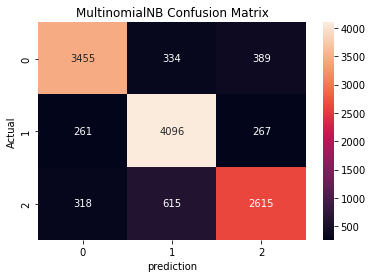

              precision    recall  f1-score   support

          -1       0.85      0.83      0.84     16636
           0       0.82      0.88      0.85     18587
           1       0.81      0.74      0.78     14175

    accuracy                           0.83     49398
   macro avg       0.83      0.82      0.82     49398
weighted avg       0.83      0.83      0.83     49398

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84      4178
           0       0.81      0.89      0.85      4624
           1       0.80      0.74      0.77      3548

    accuracy                           0.82     12350
   macro avg       0.82      0.82      0.82     12350
weighted avg       0.82      0.82      0.82     12350



In [16]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

### Linear Svc


Testing accuracy   : 85.4331983805668 %
MSE [TEST]          : 0.34898785425101214
Training accuracy  : 86.0804081136888 %
MSE [TRAIN]         : 0.3340216203085145
precision :  0.854331983805668
recall    :  0.854331983805668
f1_score  :  0.854331983805668


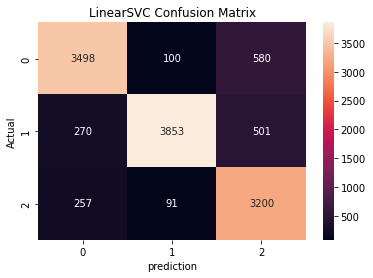

              precision    recall  f1-score   support

          -1       0.87      0.85      0.86     16636
           0       0.96      0.83      0.89     18587
           1       0.76      0.91      0.83     14175

    accuracy                           0.86     49398
   macro avg       0.86      0.86      0.86     49398
weighted avg       0.87      0.86      0.86     49398

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      4178
           0       0.95      0.83      0.89      4624
           1       0.75      0.90      0.82      3548

    accuracy                           0.85     12350
   macro avg       0.86      0.86      0.85     12350
weighted avg       0.87      0.85      0.86     12350



In [17]:
trained_clf_svc = LinearSVC(max_iter=2000).fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

### LogisticRegression

Testing accuracy   : 85.4251012145749 %
MSE [TEST]          : 0.3420242914979757
Training accuracy  : 86.24843111057127 %
MSE [TRAIN]         : 0.3276043564516782
precision :  0.854251012145749
recall    :  0.854251012145749
f1_score  :  0.854251012145749


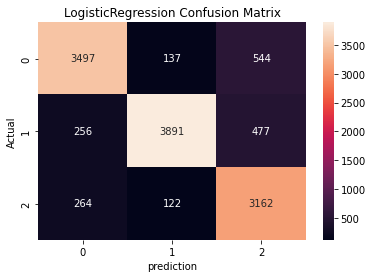

              precision    recall  f1-score   support

          -1       0.87      0.85      0.86     16636
           0       0.96      0.84      0.90     18587
           1       0.76      0.90      0.83     14175

    accuracy                           0.86     49398
   macro avg       0.86      0.87      0.86     49398
weighted avg       0.87      0.86      0.86     49398

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      4178
           0       0.94      0.84      0.89      4624
           1       0.76      0.89      0.82      3548

    accuracy                           0.85     12350
   macro avg       0.85      0.86      0.85     12350
weighted avg       0.86      0.85      0.86     12350



In [18]:
trained_clf_LogisticRegression = LogisticRegression(max_iter=200).fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

In [ ]:
pickle.dump(trained_clf_LogisticRegression, open("custom_trained_model.sav", "wb"))

### Gradient Boost


In [ ]:
trained_clf_GradientBoost=GradientBoostingClassifier()
trained_clf_GradientBoost.fit(x_train,y_train)
get_accuracy('gboost',trained_clf_GradientBoost,x_train, y_train, x_test, y_test)

### lstm Model

In [ ]:
lstmModel = Sequential(
    [
     Embedding(1000, 100, input_length=1000),
     SpatialDropout1D(0.4),
     LSTM(50, dropout=0.3, recurrent_dropout=0.3),
     Dense(3,activation='softmax')
    ]
)
lstmModel.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
lstmModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 100)         100000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 1000, 100)        0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 130,353
Trainable params: 130,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstmModel.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=3)

Epoch 1/3
501/501 [==============================] - 1039s 2s/step - loss: 0.8262 - accuracy: 0.5970 - val_loss: 0.8333 - val_accuracy: 0.5908
Epoch 2/3
501/501 [==============================] - 1088s 2s/step - loss: 0.8197 - accuracy: 0.5990 - val_loss: 0.8329 - val_accuracy: 0.5908
Epoch 3/3
501/501 [==============================] - 1038s 2s/step - loss: 0.8194 - accuracy: 0.5990 - val_loss: 0.8340 - val_accuracy: 0.5908


### Dense Model

In [34]:
X_neuro = X
y_neuro = pd.get_dummies(Y)

In [20]:
x_train_neuro,x_test_neuro,y_train_neuro,y_test_neuro =  train_test_split(X_neuro,y_neuro,random_state=42,test_size=0.20,shuffle=True)

In [21]:
DenseModel = Sequential(
    [
     Dense(1000, activation = 'relu',input_dim=1000),
     Dense(5, activation = 'relu'),
     Dense(6, activation = 'relu'),
     Dense(3,activation='softmax')
    ]
)
DenseModel.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
DenseModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
 dense_2 (Dense)             (None, 6)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 1,006,062
Trainable params: 1,006,062
Non-trainable params: 0
_________________________________________________________________


In [22]:
DenseModel.fit(x_train_neuro, y_train_neuro, validation_data=(x_test_neuro, y_test_neuro), batch_size=128, epochs=5)

Epoch 1/5
386/386 [==============================] - 9s 20ms/step - loss: 0.5163 - accuracy: 0.7890 - val_loss: 0.3778 - val_accuracy: 0.8567
Epoch 2/5
386/386 [==============================] - 8s 20ms/step - loss: 0.3525 - accuracy: 0.8615 - val_loss: 0.3629 - val_accuracy: 0.8595
Epoch 3/5
386/386 [==============================] - 10s 26ms/step - loss: 0.3133 - accuracy: 0.8784 - val_loss: 0.3684 - val_accuracy: 0.8568
Epoch 4/5
386/386 [==============================] - 10s 27ms/step - loss: 0.2740 - accuracy: 0.8946 - val_loss: 0.3741 - val_accuracy: 0.8560
Epoch 5/5
386/386 [==============================] - 8s 20ms/step - loss: 0.2363 - accuracy: 0.9106 - val_loss: 0.3970 - val_accuracy: 0.8521


In [23]:
DenseModel.evaluate(x_test_neuro, y_test_neuro)

386/386 [==============================] - 3s 7ms/step - loss: 0.3970 - accuracy: 0.8521


[0.3970085084438324, 0.8520647883415222]

In [24]:
y_hat = DenseModel.predict(x_test_neuro)

In [25]:
def getCats(y_hat):
  cat_list = []
  for i in y_hat:
    cat_list.append(np.argmax(i) - 1)
  return np.array(cat_list)

In [26]:
y_test_new = getCats(y_hat)

In [28]:
y_pred =np.array(K.variable(np_utils.to_categorical(K.argmax(y_hat), num_classes=3)))

In [29]:
y_pred_new = y_pred.reshape(-1,1)

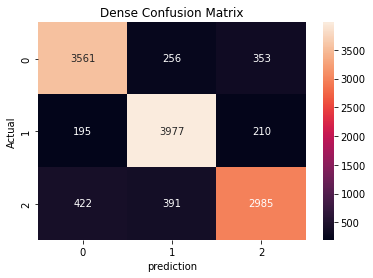

In [30]:
DenseCM = confusion_matrix(y_test_new,y_test)
sns.heatmap(DenseCM,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("Dense"+ ' Confusion Matrix')
plt.show()

In [31]:
DenseModel.save('Dense_Model.h5')